Part A

In [4]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from collections import Counter
from nltk.util import ngrams

train = pd.read_csv('train.csv')

nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

disasterTweets = train[train['sentiment'] == 'negative']
normalTweets = train[train['sentiment'] == 'positive']

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

disaster_words = [lemmatizer.lemmatize(word.lower()) for tweet in disasterTweets.iterrows() for word in word_tokenize(tweet[1]['review']) if word.isalpha()]
disaster_word_counts = Counter(disaster_words)
top_disaster_words = disaster_word_counts.most_common(20)

normal_words = [lemmatizer.lemmatize(word.lower()) for tweet in normalTweets.iterrows() for word in word_tokenize(tweet[1]['review']) if word.isalpha()]
normal_word_counts = Counter(normal_words)
top_normal_words = normal_word_counts.most_common(20)

disaster_bigrams = list(ngrams(disaster_words, 2))
disaster_trigrams = list(ngrams(disaster_words, 3))
normal_bigrams = list(ngrams(normal_words, 2))
normal_trigrams = list(ngrams(normal_words, 3))


[nltk_data] Downloading package punkt to /home/xan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/xan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/xan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


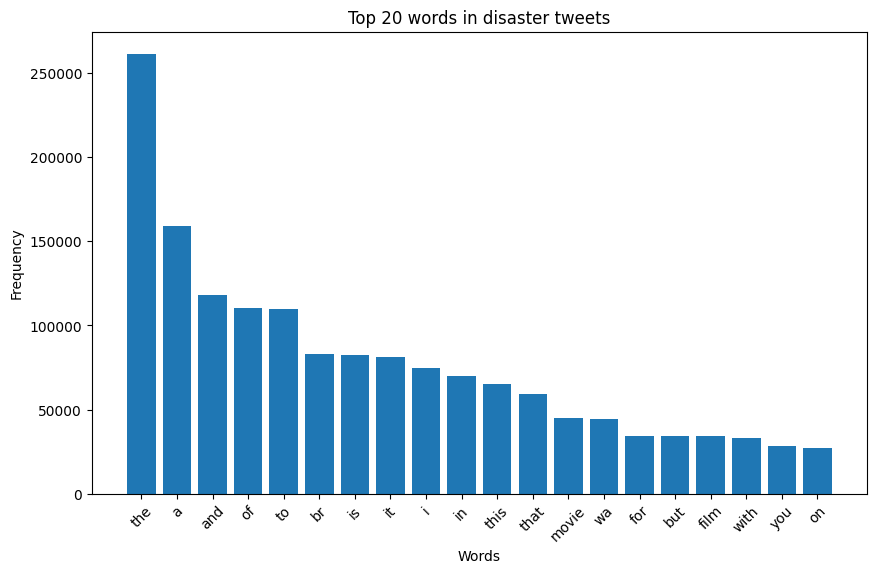

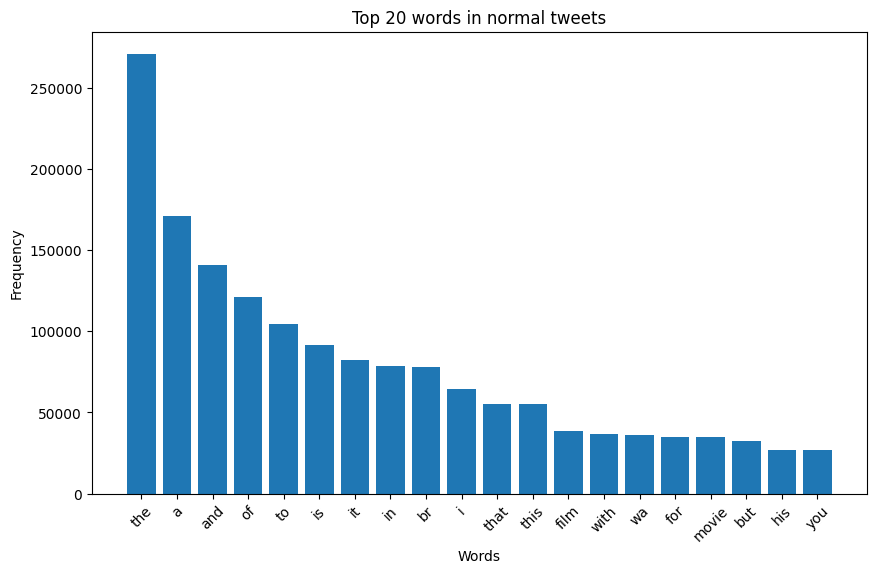

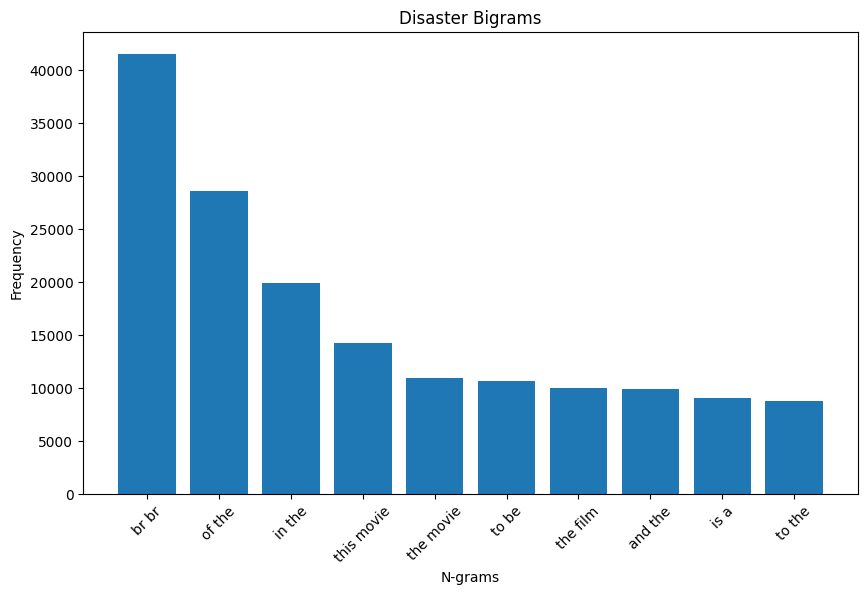

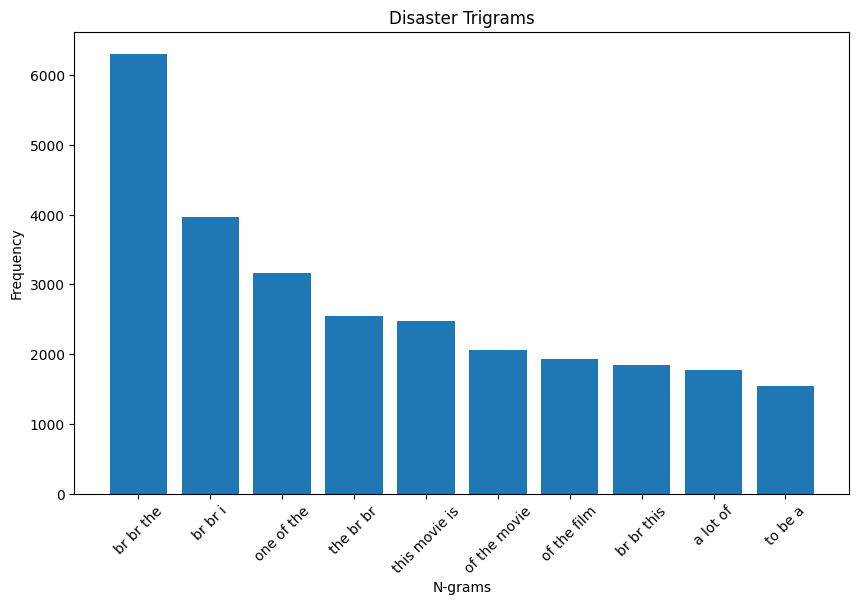

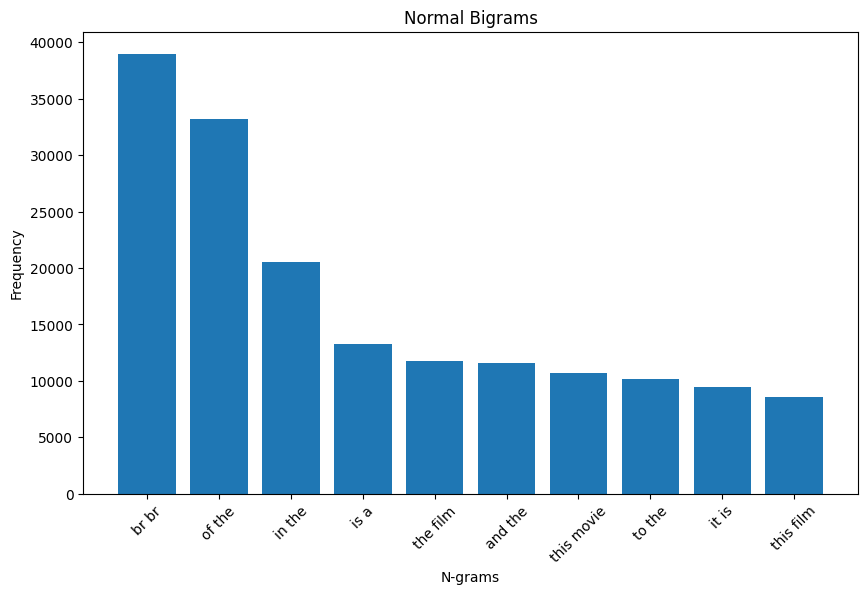

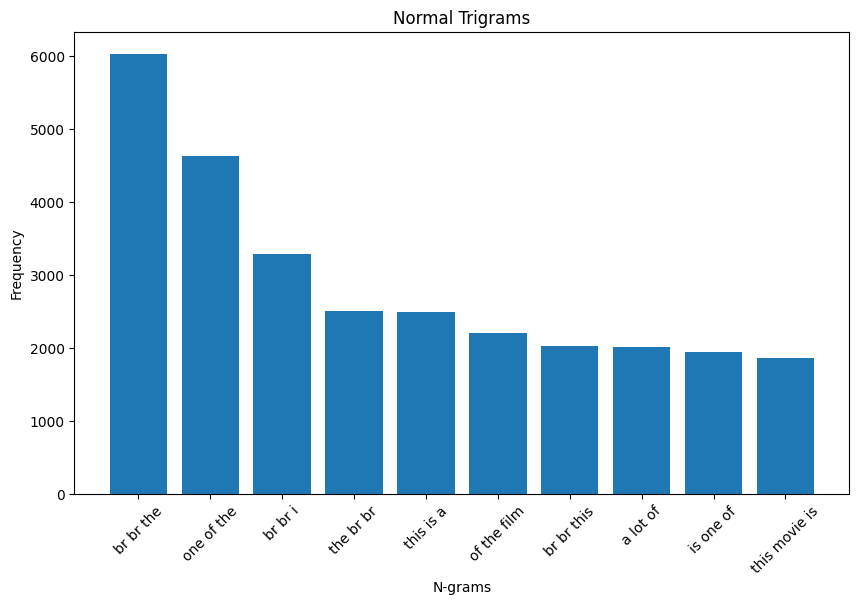

In [5]:
import matplotlib.pyplot as plt

def visualize_top_words(top_words, title):
    words, counts = zip(*top_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts)
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

def visualize_ngrams(ngrams, title):
    ngram_strings = [' '.join(ngram) for ngram in ngrams]
    ngram_counts = Counter(ngram_strings)
    top_ngrams = ngram_counts.most_common(10)
    ngrams, counts = zip(*top_ngrams)
    plt.figure(figsize=(10, 6))
    plt.bar(ngrams, counts)
    plt.title(title)
    plt.xlabel('N-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

visualize_top_words(top_disaster_words, 'Top 20 words in disaster tweets')
visualize_top_words(top_normal_words, 'Top 20 words in normal tweets')

visualize_ngrams(disaster_bigrams, 'Disaster Bigrams')
visualize_ngrams(disaster_trigrams, 'Disaster Trigrams')

visualize_ngrams(normal_bigrams, 'Normal Bigrams')
visualize_ngrams(normal_trigrams, 'Normal Trigrams')


Part B

In [6]:
import re 

nltk.download('stopwords')

def preprocess_tweet(tweet):
    tweet = re.sub(r'@[A-Za-z0-9_]+', '', tweet)
    tweet = re.sub(r'[^\w\s]', '', tweet)
    tokens = word_tokenize(tweet)
    filtered_tokens = [lemmatizer.lemmatize(word.lower()) for word in tokens if word.lower() not in stop_words and word.isalpha()]
    return ' '.join(filtered_tokens)

cleaned_disaster_tweets = [preprocess_tweet(tweet[1]['review']) for tweet in disasterTweets.iterrows()]
cleaned_normal_tweets = [preprocess_tweet(tweet[1]['review']) for tweet in normalTweets.iterrows()]


[nltk_data] Downloading package stopwords to /home/xan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Part C

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

all_tweets = cleaned_disaster_tweets + cleaned_normal_tweets

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(all_tweets)

print("Vocabulary: ", vectorizer.get_feature_names_out())
print(len(vectorizer.get_feature_names_out()))


Vocabulary:  ['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' ... 'þór' 'יגאל' 'כרמון']
144455


In [8]:
from sklearn.model_selection import train_test_split

y = [1] * len(cleaned_normal_tweets) + [0] * len(cleaned_disaster_tweets)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=125
)

In [13]:
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    precision_score,
    f1_score)
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

def compute_performance(max_features):
    all_tweets = cleaned_disaster_tweets + cleaned_normal_tweets
    vectorizer = CountVectorizer(max_features=max_features)
    X = vectorizer.fit_transform(all_tweets)
    y = [1] * len(cleaned_normal_tweets) + [0] * len(cleaned_disaster_tweets)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.33, random_state=125
    )

    log_reg = LogisticRegression(random_state=77)
    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    f1 = f1_score(y_pred, y_test, average="weighted")

    print(f"Results for max_features={max_features}")
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1, end='\n\n')

MFs = [100, 250, 500, 750, 1000]

for max_features in MFs:
    compute_performance(max_features)

Results for max_features=100
Accuracy: 0.7417424242424242
Recall: 0.74863045860072
Precision: 0.7262374734284847
F1 Score: 0.7418081416092007

Results for max_features=250
Accuracy: 0.791060606060606
Recall: 0.8034242232086239
Precision: 0.7695110841178256
F1 Score: 0.7911626699564888

Results for max_features=500
Accuracy: 0.8381060606060606
Recall: 0.8485038383205389
Precision: 0.8223504403279684
F1 Score: 0.8381496442732328



/home/xan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Results for max_features=750
Accuracy: 0.8475757575757575
Recall: 0.8562305295950156
Precision: 0.8346492559975706
F1 Score: 0.8476039355533138

Results for max_features=1000
Accuracy: 0.8540909090909091
Recall: 0.862589480236539
Precision: 0.8416337686000608
F1 Score: 0.8541161032823581



/home/xan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
